In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

import mne
from mne.preprocessing import (
    compute_proj_ecg,
    compute_proj_eog,
    create_ecg_epochs,
    create_eog_epochs,
)
%matplotlib qt

from mne.preprocessing import ICA

In [2]:
raw = mne.io.read_raw_fif('pre_filtered_data_raw.fif', preload=True)

Opening raw data file pre_filtered_data_raw.fif...
    Range : 25000 ... 1583999 =     50.000 ...  3167.998 secs
Ready.
Opening raw data file /home/ijekt/Documents/cs_cog_fat/pre_filtered_data_raw-1.fif...
    Range : 1584000 ... 2135999 =   3168.000 ...  4271.998 secs
Ready.
Reading 0 ... 2110999  =      0.000 ...  4221.998 secs...


Effective window size : 4.096 (s)


libGL error: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: iris
libGL error: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: swrast


Using matplotlib as 2D backend.


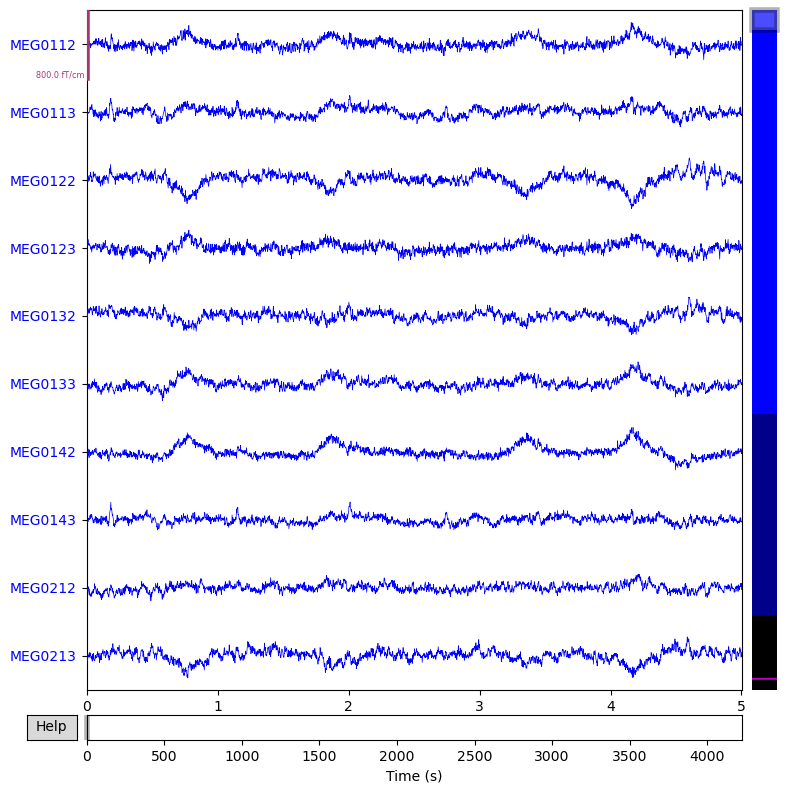

Channels marked as bad:
none


In [4]:
raw.compute_psd(fmax=200).plot(picks="data", exclude="bads")
raw.plot(duration=5, n_channels=10)

In [3]:
raw.info

<Info | 16 non-empty values
 acq_pars: ACQactiveGround 0 ACQch.BIO001.gain 2000 ACQch.BIO001.highpass ...
 bads: []
 ch_names: EOG002, ECG003, ECG, BIO005, EEG001, EEG002, EEG003, EEG004, ...
 chs: 1 EOG, 2 BIO, 1 ECG, 30 EEG, 102 Magnetometers, 204 Gradiometers, 2 Stimulus, 1 SYST
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 544 items (3 Cardinal, 5 HPI, 31 EEG, 505 Extra)
 file_id: 4 items (dict)
 highpass: 1.0 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 200.0 Hz
 meas_date: 2023-09-01 12:50:17 UTC
 meas_id: 4 items (dict)
 nchan: 343
 proc_history: 1 item (list)
 projs: []
 sfreq: 500.0 Hz
 subject_info: 6 items (dict)
>

In [ ]:
raw.compute_psd(fmax=200).plot(picks="data", exclude="bads")
raw.plot(duration=5, n_channels=20, scalings='auto')

# ECG

In [3]:
# Create ECG epochs
ecg_epochs = create_ecg_epochs(raw).average(picks="all")
ecg_evoked = ecg_epochs.apply_baseline((None, None))
ecg_evoked.plot_joint()

Using channel ECG to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5000 samples (10.000 s)

Number of ECG events detected : 4870 (average pulse 69 / min.)
Not setting metadata
4870 matching events found
No baseline correction applied
Using data from preloaded Raw for 4870 events and 501 original time points ...
1 bad epochs dropped
Applying baseline correction (mode: mean)
No projector specified for this dataset. Please consider the method self.add_proj.


[<Figure size 800x420 with 6 Axes>,
 <Figure size 800x420 with 6 Axes>,
 <Figure size 800x420 with 6 Axes>]

In [3]:
# Compute ECG projections
projs, events = compute_proj_ecg(raw, n_grad=1, n_mag=1, n_eeg=1, reject=None, ch_name='ECG')

Including 0 SSP projectors from raw file
Running ECG SSP computation
Using channel ECG to identify heart beats.
Setting up band-pass filter from 5 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 35.25 Hz)
- Filter length: 5000 samples (10.000 s)

Number of ECG events detected : 4875 (average pulse 69 / min.)
Computing projector
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hamming window
- Lower passband edge: 1.00
- Lower tr

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 338 out of 338 | elapsed:   31.3s finished


Not setting metadata
4875 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 4875 events and 301 original time points ...
1 bad epochs dropped
Adding projection: planar--0.200-0.400-PCA-01
Adding projection: axial--0.200-0.400-PCA-01
Adding projection: eeg--0.200-0.400-PCA-01
Done.


In [5]:
ecg_projs = projs
print(ecg_projs)

[<Projection | ECG-planar--0.200-0.400-PCA-01, active : False, n_channels : 204, exp. var : 84.15%>, <Projection | ECG-axial--0.200-0.400-PCA-01, active : False, n_channels : 102, exp. var : 89.15%>, <Projection | ECG-eeg--0.200-0.400-PCA-01, active : False, n_channels : 30, exp. var : 78.11%>]


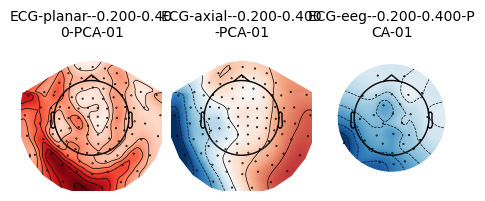

In [6]:
mne.viz.plot_projs_topomap(ecg_projs, info=raw.info)

In [7]:
#ecg_picks = mne.pick_types(ecg_evoked.info, meg=False, eeg=False, eog=False, stim=False, ecg=True)

fig = mne.viz.plot_projs_joint(ecg_projs, ecg_evoked, "ecg")
fig.suptitle("ECG projectors")

1 projection items deactivated
1 projection items deactivated
1 projection items deactivated


Text(0.5, 0.98, 'ECG projectors')

# EOG

In [3]:
eog_evoked = create_eog_epochs(raw).average(picks="all")
eog_evoked.apply_baseline((None, None))
eog_evoked.plot_joint()

Using EOG channel: EOG002
EOG channel index for this subject is: [0]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel EOG002 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 s)

Now detecting blinks and generating corresponding events
Found 197 significant peaks
Number of EOG events detected: 197
Not setting metadata
197 matching events found
No baseline correction applied
Using data from preloaded Raw for 197 events and 501 original time points ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
No projector specified for this dataset. Please consider the method self.add_proj.


[<Figure size 800x420 with 6 Axes>,
 <Figure size 800x420 with 6 Axes>,
 <Figure size 800x420 with 6 Axes>]

In [3]:
eog_projs, _ = compute_proj_eog(
    raw, n_grad=1, n_mag=1, n_eeg=1, ch_name='EOG002', reject=None, no_proj=True
)

Running EOG SSP computation
Using EOG channel: EOG002
EOG channel index for this subject is: [0]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel EOG002 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 s)

Now detecting blinks and generating corresponding events
Found 197 significant peaks
Number of EOG events detected: 197
Computing projector


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hamming window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 35.25 Hz)
- Filter length: 5000 samples (10.000 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 338 out of 338 | elapsed:   32.6s finished


Not setting metadata
197 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 197 events and 201 original time points ...
0 bad epochs dropped
Adding projection: planar--0.200-0.200-PCA-01
Adding projection: axial--0.200-0.200-PCA-01
Adding projection: eeg--0.200-0.200-PCA-01
Done.


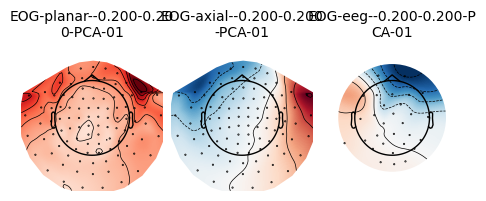

In [10]:
mne.viz.plot_projs_topomap(eog_projs, info=raw.info)

In [11]:
fig = mne.viz.plot_projs_joint(eog_projs, eog_evoked, "eog")
fig.suptitle("EOG projectors")

1 projection items deactivated
1 projection items deactivated
1 projection items deactivated


Text(0.5, 0.98, 'EOG projectors')

In [12]:
eog_projs_bad, _ = compute_proj_eog(
    raw, n_grad=1, n_mag=2, n_eeg=2, ch_name='EOG002', reject=None, no_proj=True
)
fig = mne.viz.plot_projs_joint(eog_projs_bad, eog_evoked, picks_trace="eog")
fig.suptitle("Too many EOG projectors")

Running EOG SSP computation
Using EOG channel: EOG002
EOG channel index for this subject is: [0]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel EOG002 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 s)

Now detecting blinks and generating corresponding events
Found 197 significant peaks
Number of EOG events detected: 197
Computing projector
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass f

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 338 out of 338 | elapsed:   33.0s finished


Not setting metadata
197 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 197 events and 201 original time points ...
0 bad epochs dropped
Adding projection: planar--0.200-0.200-PCA-01
Adding projection: axial--0.200-0.200-PCA-01
Adding projection: axial--0.200-0.200-PCA-02
Adding projection: eeg--0.200-0.200-PCA-01
Adding projection: eeg--0.200-0.200-PCA-02
Done.
2 projection items deactivated
2 projection items deactivated
1 projection items deactivated


Text(0.5, 0.98, 'Too many EOG projectors')

In [5]:
# Create a copy of the raw data before applying SSP for comparison
raw_ssp = raw.copy()

# add projs as Object to raw data
raw_ssp.add_proj(projs)

# Apply SSP projectors to the copy
#raw_ssp.apply_proj()

3 projection items deactivated


<Raw | pre_filtered_data_raw.fif, 343 x 2111000 (4222.0 s), ~5.40 GB, data loaded>

In [6]:
raw_ssp.save('SSP_ecg_raw.fif', overwrite=True)

Writing /home/ijekt/Documents/cs_cog_fat/SSP_ecg_raw.fif
Closing /home/ijekt/Documents/cs_cog_fat/SSP_ecg_raw.fif
Writing /home/ijekt/Documents/cs_cog_fat/SSP_ecg_raw-1.fif
Closing /home/ijekt/Documents/cs_cog_fat/SSP_ecg_raw-1.fif
[done]


In [7]:
# Plot raw data after SSP for comparison
raw_ssp.plot(duration=5, n_channels=20, scalings='auto')

Using qt as 2D backend.


Channels marked as bad:
none


In [ ]:
# Plot raw data after SSP for comparison
raw.plot(duration=5, n_channels=20, scalings='auto')